In [64]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from random import randrange
from random import random

In [65]:
neighbour_list = {
          1 : [2, 5],
          2 : [1, 3, 5],
          3 : [2, 4],
          4 : [3, 5],
          5 : [1, 2, 4]
}

In [66]:
example = [
                 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
                 [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
                 [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
                 [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
]

# Zadanie 1

### Funkcja from_list_to_matrix_neighbour konwertuje listę sąsiedztwa na macierz sąsiedztwa. Na wejściu przyjmuje listę sąsiedztwa w postaci słownika, którego kluczem jest indeks wierzchołka a wartością tablica przechowująca indeksy wierzchołków sąsiednich. Zwraca macierz sąsiedztwa w postaci tablicy tablic. 

In [67]:
def from_list_to_matrix_neighbour(list):
    matrix = []
    length = len(list)
    for elements in list.values():
        row = []
        for i in range(1, length + 1):
            if i in elements:
                row.append(1)
            else :
                row.append(0)
        matrix.append(row)
    #print_matrix(matrix)
    return matrix

### Funkcje from_matrix_neighbour_to_list konwertuje macierz sąsiedztwa na listę sąsiedztwa. Na wejściu przyjmuje macierz sąsiedztwa w postaci tablicy tablic. Na wyjściu zwraca listę sąsiedztwa w postaci słownika którego kluczem jest indeks wierzchołka, zaś wartością jest tablica przechowująca indeksy sąsiednich wierzchołków.

In [68]:
def from_matrix_neighbour_to_list(matrix):
    list = {}

    i = 0
    for row in matrix:
        i += 1
        row_list = []
        lenght = len(row)
        for j in range(lenght):
            if row[j] == 1:
                row_list.append(j + 1)
        list[i] = row_list
    return list

### Funkcja from_list_to_incidence_matrix konwertuje listę sąsiedztwa na macierz incydencji. Na wejściu przyjmuje listę sąsiedztwa w postaci słownika którego kluczem jest indeks wierzchołka, zaś wartością jest tablica przechowująca indeksy sąsiednich wierzchołków. Na wyjściu zwraca macierz incydencji w postaci tablicy tablic.

In [69]:
def from_list_to_incidence_matrix(list):
    matrix = []

    for key, value in list.items():
        ranger = key        #ranger check if we do not use element used
                            # in previous iterations to prevent from doubling same row
        for elem in value:
            if ranger < elem:
                row = [0] * len(list)
                row[key - 1] = 1
                row[elem - 1] = 1
                matrix.append(row)

    #print_matrix(matrix)
    return matrix


### Funkcja from_incidence_matrix_to_list konwertuje macierz incydencji na listę sąsiedztwa. Na wejściu przyjmuje macierz incydencji w postaci tablicy tablic. Na wyjściu zwraca listę sąsiedztwa w postaci słownika którego kluczem jest indeks wierzchołka, zaś wartością jest tablica przechowująca indeksy sąsiednich wierzchołków.

In [70]:
def from_incidence_matrix_to_list(matrix):
    list = {}
    for row in matrix:
        i = -1
        j = -1
        for k in range(len(row)):
            if row[k] == 1:
                if i != -1:
                  j = k + 1
                else:
                    i = k + 1
        if i in list:
            list[i].append(j)
        else:
            list[i] = [j]

        if j in list:
            list[j].append(i)
        else:
            list[j] = [i]

    l = {}
    for key in sorted(list):
        l[key] = list[key]
    list = l
    #print_list(list)
    return list

## Testy

In [71]:
from_list_to_matrix_neighbour(neighbour_list)

[[0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0]]

In [72]:
from_matrix_neighbour_to_list(example)

{1: [2, 5, 6],
 2: [1, 3, 6],
 3: [2, 4, 5, 12],
 4: [3, 8, 9, 11],
 5: [1, 3, 7, 9],
 6: [1, 2, 7],
 7: [5, 6, 8],
 8: [4, 7, 9, 12],
 9: [4, 5, 8, 10],
 10: [9],
 11: [4],
 12: [3, 8]}

In [73]:
list = from_matrix_neighbour_to_list(example)
from_list_to_matrix_neighbour(list)

[[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]]

# Zadanie 2

In [74]:
array = np.matrix(example)

### Funkcja calculate_nodes_position wyznacza pozycje wierzchołków grafów. Na wejściu przyjmuje liczbę wierzchołków. Zwraca słownik, którego kluczem jest numer wierzchołka zaś wartością jest krotka zawierająca współrzędne wierzchołka.

In [75]:
def calculate_nodes_position(n_of_nodes):
    nodes = {}
    for n in range(0, n_of_nodes):
        x = math.cos(2 * math.pi / n_of_nodes * n)
        y = math.sin(2 * math.pi / n_of_nodes * n)
        nodes.update({n: (x, y)})
    return nodes

### Funkcja create_graph_visualization na podstawie macierzy sąsiedztwa wyznacza ilość wierzchołków oraz pozycje poszczególnych wierzchołków, a następnie rysuje graf. Przyjmuje na wejściu macierz sąsiedztwa w postaci numpy matrix. Funkcja nic nie zwraca.

In [76]:
def create_graph_visualization(matrix):
    sizes = matrix.shape
    if len(sizes) != 2 or sizes[0] != sizes[1]:
        print("Incorrect matrix!")
        return
    if len(matrix) > 0:
        nodes = calculate_nodes_position(len(matrix))
        plt.figure(figsize=(5, 5))
        graph_visualization = nx.from_numpy_matrix(matrix)
        nx.draw_networkx(graph_visualization, nodes)
        plt.show()
    else:
        print("Empty matrix!")

## Testy

In [77]:
create_graph_visualization(np.array([]))

Incorrect matrix!


In [78]:
create_graph_visualization(np.array([[0, 0, 0]]))

Incorrect matrix!


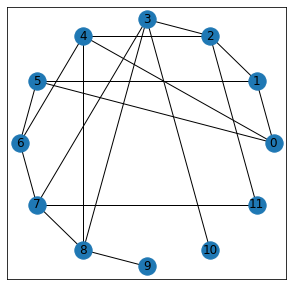

In [79]:
create_graph_visualization(array)

# Zadanie 3

### Funkcja rand_graph_A zwraca losowy graf o zadanej ilości krawędzi i liczbie wierzchołków. Przyjmuje na wejściu n - ilość wierzchołków i l - ilość krawędzi. Funkcja zwraca graf w postaci macierzy sąsiedztwa

In [80]:
def rand_graph_A(n,l):
    if n == 0:
        matrix = [[]]
    else:
        matrix = [[0 for i in range(n)] for j in range(n)]
        iter = 0
        while(l > 0):
            i = randrange(0, n)
            j = randrange(0, n)
            if matrix[i][j] == 0 and i != j:
                matrix[i][j] = 1
                matrix[j][i] = 1
                l = l - 1
            else:
                iter = iter + 1
            if iter > 1000:
                print("Couldn't create matrix!")
                matrix = [[]]
                break

    return matrix

### Funkcja rand_graph_B zwraca losowy graf o zadanej liczbie wierzchołków i zadanym prawdobodobieństwie. Przyjmuje na wejściu n - liczbę wierzchołków i p - wartość prawdopodobieństwa. Funkcja zwraca graf w postaci macierzy sąsiedztwa

In [81]:
def rand_graph_B(n,p):
    matrix = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(i+1,n):
            if(p > random()):
                matrix[i][j] = 1
                matrix[j][i] = 1
    return matrix

## Testy

In [82]:
matrix = rand_graph_A(0, 0)
create_graph_visualization(np.matrix(matrix))

Incorrect matrix!


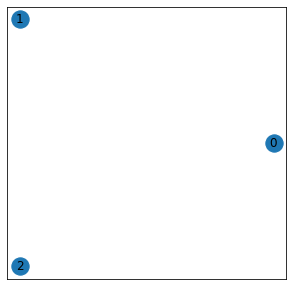

In [83]:
matrix = rand_graph_A(3, 0)
create_graph_visualization(np.matrix(matrix))

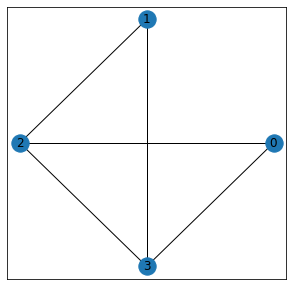

In [84]:
matrix = rand_graph_A(4, 5)
create_graph_visualization(np.matrix(matrix))

In [85]:
matrix = rand_graph_A(0, 1)
create_graph_visualization(np.matrix(matrix))

Incorrect matrix!


In [86]:
matrix = rand_graph_A(3, 15)
create_graph_visualization(np.matrix(matrix))

Couldn't create matrix!
Incorrect matrix!


In [87]:
matrix = rand_graph_B(0, 0.0)
create_graph_visualization(np.matrix(matrix))

Incorrect matrix!


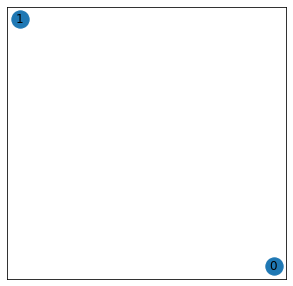

In [88]:
matrix = rand_graph_B(2, 0.0)
create_graph_visualization(np.matrix(matrix))

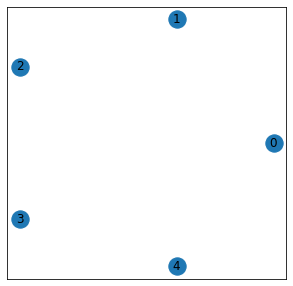

In [89]:
matrix = rand_graph_B(5, 0.0)
create_graph_visualization(np.matrix(matrix))

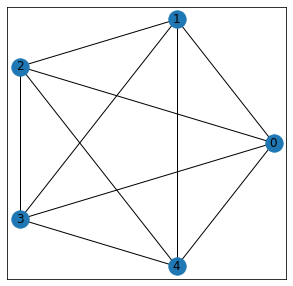

In [90]:
matrix = rand_graph_B(5, 1.0)
create_graph_visualization(np.matrix(matrix))

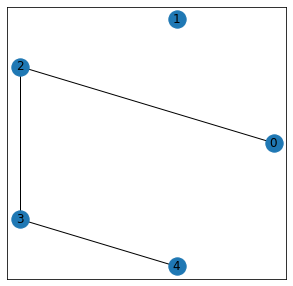

In [91]:
matrix = rand_graph_B(5, 0.3)
create_graph_visualization(np.matrix(matrix))